In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [38]:
# Определяем масштабирование
df_train = pd.read_csv("./content/train_dataset_train.csv")
df_test = pd.read_csv("./content/test_dataset_test.csv")
df = pd.concat([df_train,df_test], axis=0)
df.set_index('id', inplace=True)
X = df.drop(["Class"], axis = 1)
sc = StandardScaler() # вот ради него все и делается
X = sc.fit_transform(X) # вот оно
del df_train
del df_test
del df
del X

In [39]:
df_train = pd.read_csv("./content/train_dataset_train.csv")
df_train.set_index('id', inplace=True)

In [40]:
df_train.head()

,Easting,Northing,Height,Reflectance,Class
id,,,,,
2321251,431696.5375,6.032319e+06,69.2226,-11.14,0
3515173,431710.3835,6.032291e+06,68.9711,-15.16,3
2320295,431696.8099,6.032322e+06,69.2453,-13.59,0
2454459,431680.4542,6.032343e+06,69.1892,-11.21,0
4608150,431720.0914,6.032288e+06,67.3252,-9.10,0


## Рассмотрим датасет по ближе

In [41]:
df_train.shape

(4222094, 5)

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4222094 entries, 2321251 to 220404
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Easting      float64
 1   Northing     float64
 2   Height       float64
 3   Reflectance  float64
 4   Class        int64  
dtypes: float64(4), int64(1)
memory usage: 193.3 MB


Построим на распределение данных

Text(0.5, 1.0, 'Распределение класса точки')

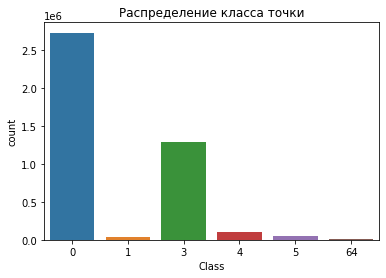

In [43]:
sns.countplot(x = "Class" , data  = df_train).set_title('Распределение класса точки')

## Выделим выборки

In [51]:
df_train = df_train.fillna(0)

In [52]:
class2idx = {
    0:0,
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    64:6
}

idx2class = {v: k for k, v in class2idx.items()}

df_train['Class'].replace(class2idx, inplace=True)

In [53]:
X = df_train.drop(["Class"], axis = 1)
y = df_train[["Class"]]

In [54]:
X.shape

(4222094, 4)

In [49]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
#y_train

### Масштабируем признаки

In [55]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
X = sc.transform(X)

## Обучение модели

In [56]:
clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 50)
#clf.fit(X_train, y_train.values.ravel())
clf.fit(X, y.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=50)

## Оценка точности

In [57]:
#pred = clf.predict(X_test)

In [58]:
#y_test.head(3)

In [21]:
#result = recall_score(y_test, pred, average='macro', zero_division=True)
#print("Recall score",result)

Recall score 0.8735318630318814


## Готовим результат

In [59]:
df_test = pd.read_csv("./content/test_dataset_test.csv")
df_test = df_test.set_index('id')
df_test = df_test.fillna(0)
df_test['Class'] = 0 
X = df_test.drop(["Class"], axis = 1)
X = sc.transform(X) # Масштабируем признаки
y = df_test[["Class"]]

In [60]:
# Масштабируем признаки
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)

In [61]:
y_pred = clf.predict(X)

In [62]:
y_pred

array([0, 3, 0, ..., 0, 0, 3], dtype=int64)

In [63]:
y.loc[:,'Class'] = y_pred

C:\Users\Сергей\AppData\Local\Temp\ipykernel_16380\1696749701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:,'Class'] = y_pred


In [64]:
y

,Class
id,
1836965,0
3659389,3
5433033,0
1168709,3
5821779,3
...,...
2279523,0
220720,0
3877535,0


In [65]:
y['Class'].replace(idx2class, inplace=True)

C:\Users\Сергей\AppData\Local\Temp\ipykernel_16380\818411474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'].replace(idx2class, inplace=True)


In [66]:
df_submission = y.reset_index()
df_submission

,id,Class
0,1836965,0
1,3659389,3
2,5433033,0
3,1168709,3
4,5821779,3
...,...,...
1809464,2279523,0
1809465,220720,0
1809466,3877535,0
1809467,3389299,0


In [67]:
df_submission.to_csv("./content/RSF_submission_1.csv", index=False)

### Улучшение модели

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestClassifier()
rf_p_dist={'max_depth':[3,5],#[3,5,10,None]
               'n_estimators':[10,100], #[10,100,200,300,400,500],
               'max_features':randint(1,3),
               'criterion':['entropy'], #['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X, y.values.ravel())

print(rf_parameters, rf_ht_score)

#clf=RandomForestClassifier(n_jobs=-1, n_estimators=300,bootstrap= True,criterion='entropy',max_depth=3,max_features=2,min_samples_leaf= 3)